In [129]:
import numpy as np
from matplotlib import pyplot as plt

In [130]:
GravitationalConstant = 6.67430e-11
LightSpeed = 2.99792458e8

class SolarSystem:
    def __init__(self, planets, dt):
        self.planets = planets
        self.time = 0
        self.dt = dt


    def update_acceleration(self):
        for p in self.planets: p.update_acceleration(self.planets)
    
    def update_velocity(self):
        for p in self.planets: p.update_velocity(self.dt)

    def update_position(self):
        for p in self.planets: p.update_position(self.dt)

    #returns the x coordinates as a list and the y coordinates as another list
    def get_coordinates(self):
        return [i[0] for i in self.positions], [i[1] for i in self.positions]

class Planet:
    def __init__(self, mass, start_position, start_velocity):
        #Change the values to a good value and not some arbitrary thing
        mass = mass / GravitationalConstant * LightSpeed**3
        start_position = [i * LightSpeed for i in start_position]
        start_velocity = [i * LightSpeed for i in start_velocity]

        self.mass = mass
        self.positions = [start_position]
        self.velocities = [start_velocity]
        self.acceleration = [[0,0]]
    
    def get_position(self):
        return self.positions[-1]

    # recalculate the acceleration based on the current position of the planets
    def update_acceleration(self, planets):
        resulting_acceleration = [0, 0]
        for planet in [p for p in planets if p is not self]:
            # calculate the distance between the two objects
            direction = [planet.get_position()[0] - self.get_position()[0], planet.get_position()[1] - self.get_position()[1]]
            distance = np.sqrt((direction[0])**2 + (direction[1])**2)
            direction_normalized = [i / distance for i in direction]


            force = self.mass * planet.mass * GravitationalConstant / distance**2
            acc = force / self.mass
            normalized_acceleration = [i * acc for i in direction_normalized]
            
            for i in range(len(resulting_acceleration)):
                resulting_acceleration[i] += normalized_acceleration[i]
        self.acceleration.append(resulting_acceleration)
    
    def update_velocity(self, timestep):
        self.velocities.append(
            [
                self.velocities[-1][0] + self.acceleration[-1][0] * timestep,
                self.velocities[-1][1] + self.acceleration[-1][1] * timestep,
            ]
        )
    

    #in this step, we also calculate the kinetic energy as well as the potential energy for this planet.
    def update_position(self, timestep):
        self.positions.append(
            [
                self.positions[-1][0] + self.velocities[-1][0] * timestep,
                self.positions[-1][1] + self.velocities[-1][1] * timestep
            ]
        )  

In [146]:
P1 = Planet(1.576e-6, [-7.328e-1, -5.748e-2], [9.896e-9, -1.088e-6])
P2 = Planet(1.010e-10, [-6.437e+00, -6.012e+00], [3.543e-04, -3.251e-04])
P3 = Planet(3.358e-09, [4.215e+01, -4.449e+01], [8.524e-05,1.385e-04])
P4 = Planet(1.070e-08, [9.754e+01,2.414e+01], [-3.267e-05, 1.216e-04])
P5 = Planet( 2.160e-10, [-1.364e+02, -8.212e+01], [5.521e-05, -8.753e-05])

System = SolarSystem([P1, P2, P3, P4, P5], 60)


for i in range(0, 30 * 60 * 24 * 2): #3600 * 24 * 2):
    System.update_acceleration()
    System.update_velocity()
    System.update_position()

print(P1.acceleration)

[[0, 0], [0.00017716245961627236, -0.0004379971384238134], [0.00017827463696212367, -0.00043908994929749], [0.00017939239349252197, -0.0004401780244622873], [0.00018051570240187312, -0.00044126132750813913], [0.00018164453658112376, -0.00044233982222086207], [0.00018277886861946244, -0.000443413472585212], [0.00018391867080605503, -0.0004444822427879225], [0.00018506391513181883, -0.0004455460972207266], [0.00018621457329122678, -0.0004466050004833596], [0.0001873706166841551, -0.00044765891738654247], [0.00018853201641775799, -0.00044870781295494665], [0.0001896987433083851, -0.0004497516524301375], [0.0001908707678835288, -0.00045079040127349936], [0.0001920480603838076, -0.00045182402516913796], [0.00019323059076498502, -0.0004528524900267628], [0.00019441832870002008, -0.0004538757619845468], [0.00019561124358115532, -0.0004548938074119644], [0.0001968093045220341, -0.00045590659291260634], [0.00019801248035985531, -0.0004569140853269717], [0.00019922073965755876, -0.00045791625173

(-60000000000.0, 60000000000.0)

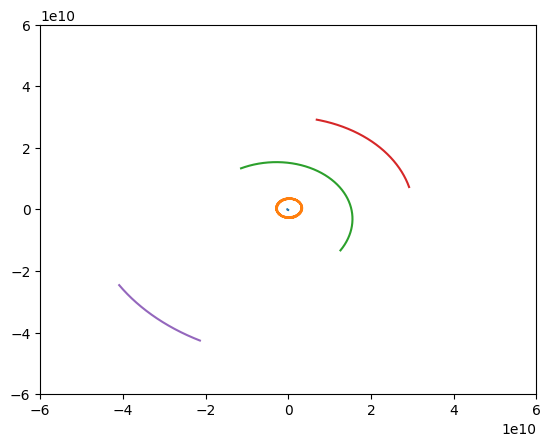

In [142]:
for planet in [P1, P2, P3, P4, P5]:
    plt.plot([i[0] for i in planet.positions], [[i[1]] for i in planet.positions])
#plt.scatter([i[0] for i in P2.positions], [[i[1]] for i in P2.positions])
#plt.scatter([i[0] for i in P3.positions], [[i[1]] for i in P3.positions])
plt.xlim(-6e10, 6e10)
plt.ylim(-6e10, 6e10)

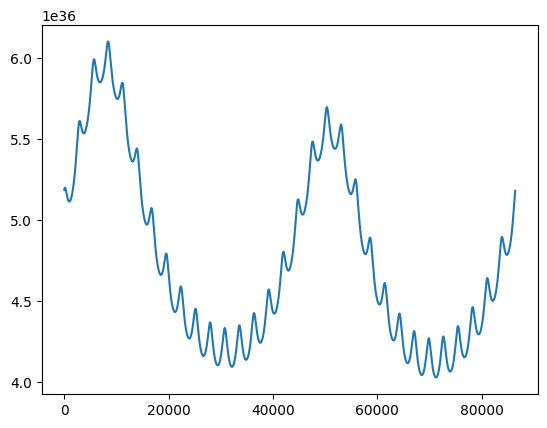

In [147]:
# now we can check for the energy conservation
#calculate the total kinetic energy for each time step
kin_e = []
for i in range(len(P2.velocities)):
    kin = 0
    for p in [P1, P2, P3, P4, P5]:
        e = 0.5 * p.mass * (p.velocities[i][1]**2 + p.velocities[i][0]**2)
        kin += e
    kin_e.append(kin)
plt.plot(kin_e)

